### Challenge 1
####Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import csv

%matplotlib inline
# import mpld3

In [37]:
df = pd.DataFrame.from_csv('2013_movies.csv')

In [38]:
df = sm.add_constant(df)
df.head(1)

,const,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,,
The Hunger Games: Catching Fire,1,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00


In [6]:
model = smf.ols("DomesticTotalGross ~ const", data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 25 Apr 2015   Prob (F-statistic):                nan
Time:                        23:34:54   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000      4.16e+07   5.9e+07
const        5.03e+07   4.37e+06     11.510      0.000      4.16e+07   5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     3.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###this predicts that for a constant, 1, our model will have residuals no better than if we had put a straight line across the mean of DomesticTotalGross. we are plotting all of DomesticTotalGross across 1  should also be a straight line

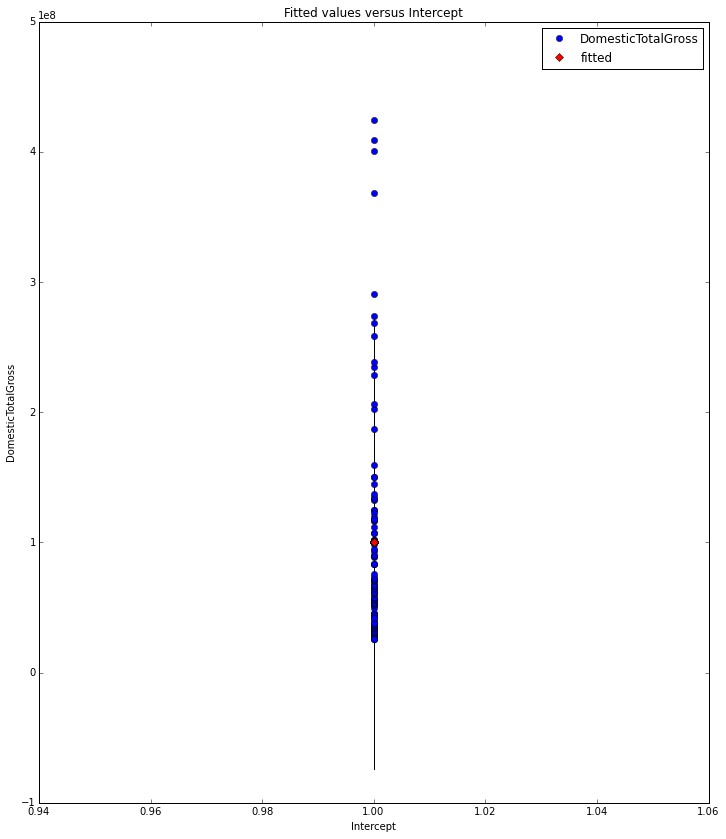

In [9]:
fig, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_fit(fitted, 0, ax=ax)

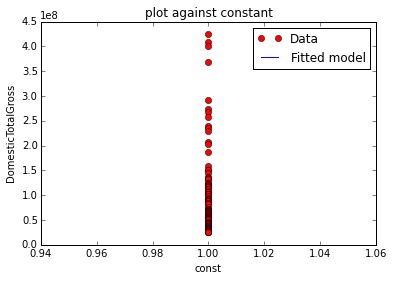

In [10]:
plt.plot(df['const'], df['DomesticTotalGross'], 'ro')
plt.plot(df['const'], fitted.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
# plt.ylim(-100000000, 500000000)
# plt.xlim(-2, 12)
plt.xlabel('const')
plt.ylabel('DomesticTotalGross')
plt.title('plot against constant')

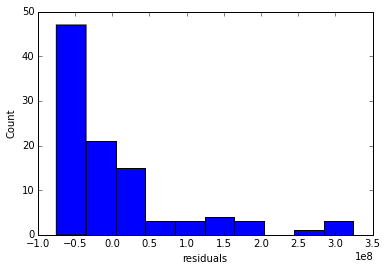

In [11]:
plt.hist(fitted.resid)
plt.ylabel('Count')
plt.xlabel('residuals')

### the residuals are skewed to the left? im not sure what this tells me?

###Challenge 2
####Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [12]:
model = smf.ols("DomesticTotalGross ~ const + Runtime", data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     9.180
Date:                Sat, 25 Apr 2015   Prob (F-statistic):            0.00313
Time:                        23:35:26   Log-Likelihood:                -1965.5
No. Observations:                 100   AIC:                             3935.
Df Residuals:                      98   BIC:                             3940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.862e+07   2.64e+07     -1.085      0.281      -8.1e+07  2.37e+07
const      -2.862e+07   2.64e+07     -1.085      0.281      -8.1e+07  2.37e+07
Runtime     1.406e+06   4.64e+05      3.030      0.003      4.85e+05  2.33e+06
==============================================================================
Omnibus:                       50.222   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.001
Skew:                           1.932   Prob(JB):                     7.19e-28
Kurtosis:                       6.883   Cond. No.                     1.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

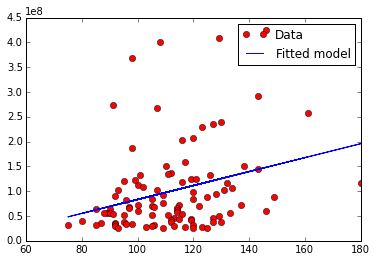

In [13]:
plt.plot(df['Runtime'], df['DomesticTotalGross'], 'ro')
plt.plot(df['Runtime'], fitted.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])

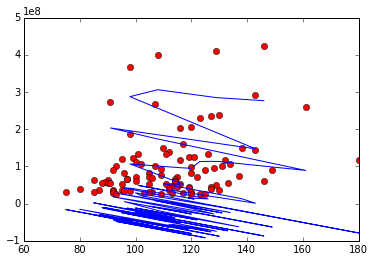

In [18]:
#Is this what is meant by plotting feature variable vs residuals? It doesn't seem very descriptive.
plt.plot(df['Runtime'], df['DomesticTotalGross'], 'ro')
plt.plot(df['Runtime'].dropna(), fitted.resid)

### Challenge 3

###Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [19]:
def rate_me(rating):
    return {i: index + 1 for index,i in enumerate(['G','PG','PG-13','R'])}[rating]
df['Rating'] = df['Rating'].apply(lambda x: rate_me(x))

In [20]:
model = smf.ols("DomesticTotalGross ~ const + Rating", data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.25
Date:                Sat, 25 Apr 2015   Prob (F-statistic):            0.00184
Time:                        23:39:53   Log-Likelihood:                -1965.0
No. Observations:                 100   AIC:                             3934.
Df Residuals:                      98   BIC:                             3939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.097e+08    1.9e+07      5.770      0.000       7.2e+07  1.47e+08
const       1.097e+08    1.9e+07      5.770      0.000       7.2e+07  1.47e+08
Rating     -3.711e+07   1.16e+07     -3.202      0.002     -6.01e+07 -1.41e+07
==============================================================================
Omnibus:                       43.543   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.455
Skew:                           1.725   Prob(JB):                     3.09e-21
Kurtosis:                       6.282   Cond. No.                     7.92e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

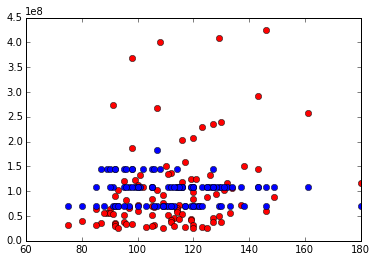

In [21]:
plt.plot(df['Runtime'], df['DomesticTotalGross'], 'ro')
plt.plot(df['Runtime'], fitted.fittedvalues, 'bo')

#### Seems to be a good fit and substantially better than plotting a straight line across the mean? 

### Challenge 4

####Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [25]:
model = smf.ols("DomesticTotalGross ~ const + Runtime + Rating + Budget", data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     11.91
Date:                Sat, 25 Apr 2015   Prob (F-statistic):           1.38e-06
Time:                        23:40:08   Log-Likelihood:                -1737.4
No. Observations:                  89   AIC:                             3483.
Df Residuals:                      85   BIC:                             3493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.392e+07   2.93e+07      0.476      0.636     -4.43e+07  7.21e+07
const       1.392e+07   2.93e+07      0.476      0.636     -4.43e+07  7.21e+07
Runtime     5.051e+05   5.06e+05      0.998      0.321     -5.01e+05  1.51e+06
Rating     -1.021e+07   1.29e+07     -0.788      0.433     -3.59e+07  1.55e+07
Budget         0.6830      0.163      4.181      0.000         0.358     1.008
==============================================================================
Omnibus:                       37.771   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.758
Skew:                           1.541   Prob(JB):                     8.78e-20
Kurtosis:                       6.764   Cond. No.                     1.24e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.29e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

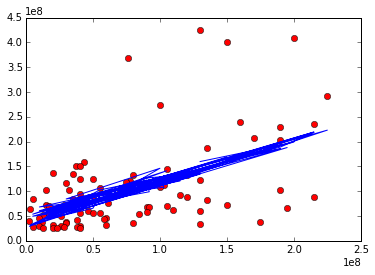

In [27]:
plt.plot(df['Budget'], df['DomesticTotalGross'], 'ro')
plt.plot(df['Budget'].dropna(), fitted.fittedvalues)

#What are some ways to transform a variable? How do you choose? Just randomly and pray?

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.



In [60]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [61]:
model = smf.ols("DomesticTotalGross ~ const + Budget", data=train)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     30.95
Date:                Sun, 26 Apr 2015   Prob (F-statistic):           5.37e-07
Time:                        09:17:31   Log-Likelihood:                -1312.0
No. Observations:                  67   AIC:                             2628.
Df Residuals:                      65   BIC:                             2632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.708e+07   7.92e+06      2.156      0.035      1.26e+06  3.29e+07
const       1.708e+07   7.92e+06      2.156      0.035      1.26e+06  3.29e+07
Budget         0.8856      0.159      5.563      0.000         0.568     1.204
==============================================================================
Omnibus:                       33.064   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.239
Skew:                           1.613   Prob(JB):                     4.59e-17
Kurtosis:                       7.067   Cond. No.                     7.41e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

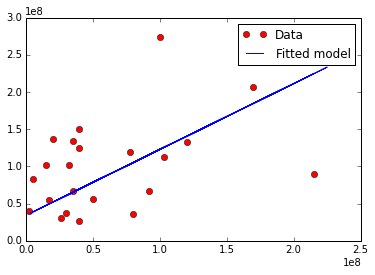

In [65]:
plt.plot(test['Budget'], test['DomesticTotalGross'], 'ro')
plt.plot(train['Budget'].dropna(), fitted.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])

#How do you compare test vs fitted just by number? Is there a way for the computer tell me a percent that it fits the test data?